# Assessment 'on drug200 dataset from kaggle' in ApplAi workshop
### By "Ali Abdallah Mohamed"

# 

# Importing the required libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [69]:
df = pd.read_csv("drug200.csv")

# Dataset Exploration "preprocessing and Visualization"

In [70]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


#### Taking a look on the catiegorical variables of categorical attributes  ..

In [72]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [73]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [74]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [75]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

#### Taking a look on the numerical variables of numerical attributes  ..

In [76]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [77]:
sns.displot(df['Age'], color='blue', kind='kde')

In [78]:
sns.displot(df['Na_to_K'], color='blue', kind='kde')

### Gender Distribution based on Drug Type

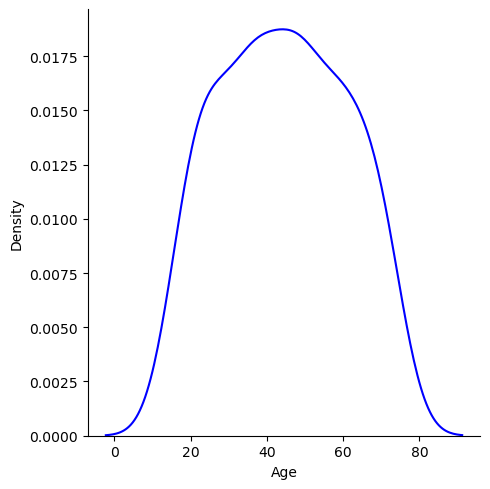

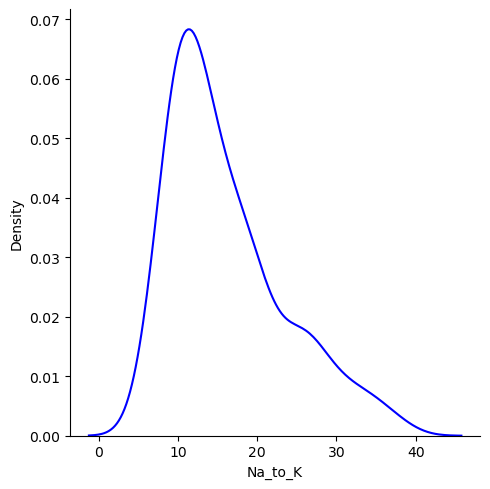

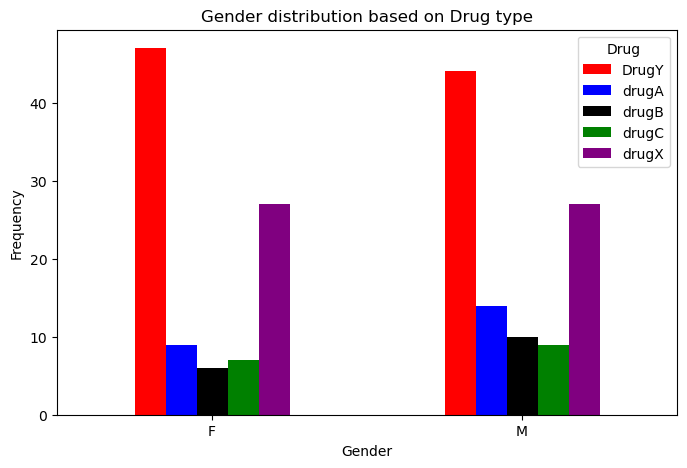

In [79]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(8,5),color=['red','blue','black','green','purple'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Blood Pressure Distribution based on Cholesetrol

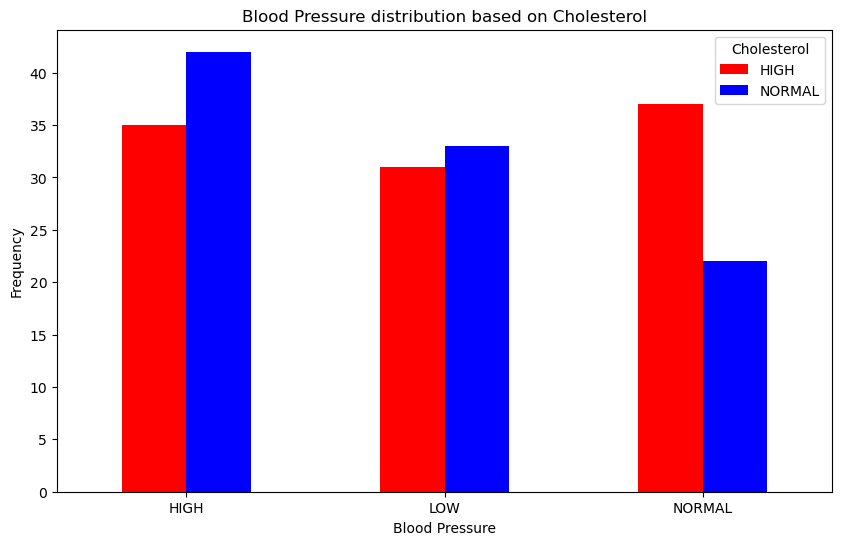

In [80]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(10,6),color=['red','blue'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Sodium to Potassium Distribution based on Gender and Age

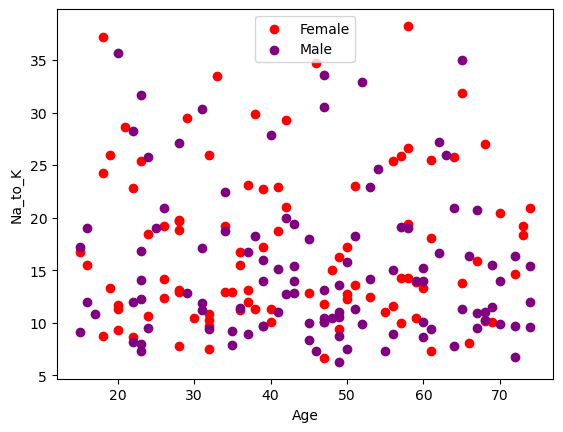

In [81]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="red")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="purple")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# Label Encoding

In [82]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
df.Sex = label_encoder.fit_transform(df.Sex)
df.Cholesterol = label_encoder.fit_transform(df.Cholesterol)
df.BP = label_encoder.fit_transform(df.BP)
df.Drug = label_encoder.fit_transform(df.Drug)

# Splitting the dataset

In [83]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [84]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


# Logistic Regression

In [85]:
LR = LogisticRegression(solver='liblinear', max_iter=5000)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred))

LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       1.00      0.60      0.75         5
           2       0.50      0.67      0.57         3
           3       0.00      0.00      0.00         4
           4       0.77      0.94      0.85        18

    accuracy                           0.82        60
   macro avg       0.63      0.62      0.61        60
weighted avg       0.78      0.82      0.79        60

Logistic Regression accuracy is: 81.67%


### Plotting the confusion matrix of Logistic Regression model

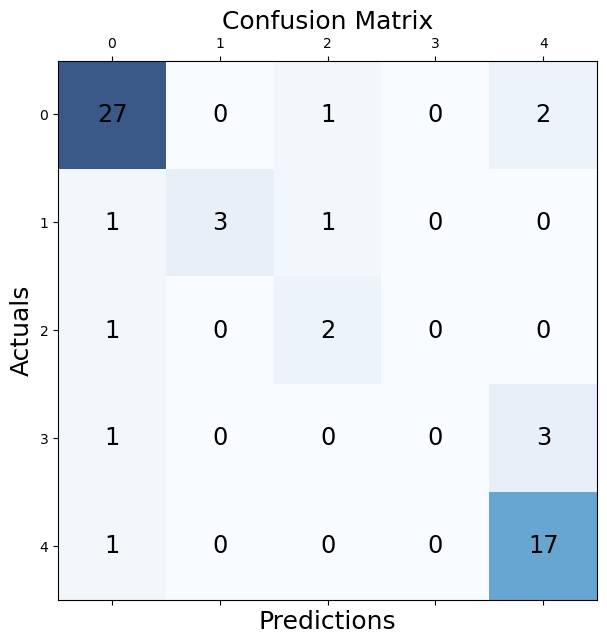

In [86]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.8)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# KNN

#### To find a optimum value of k we plot a graph of error rate vs. k value ranging from 0 to 40

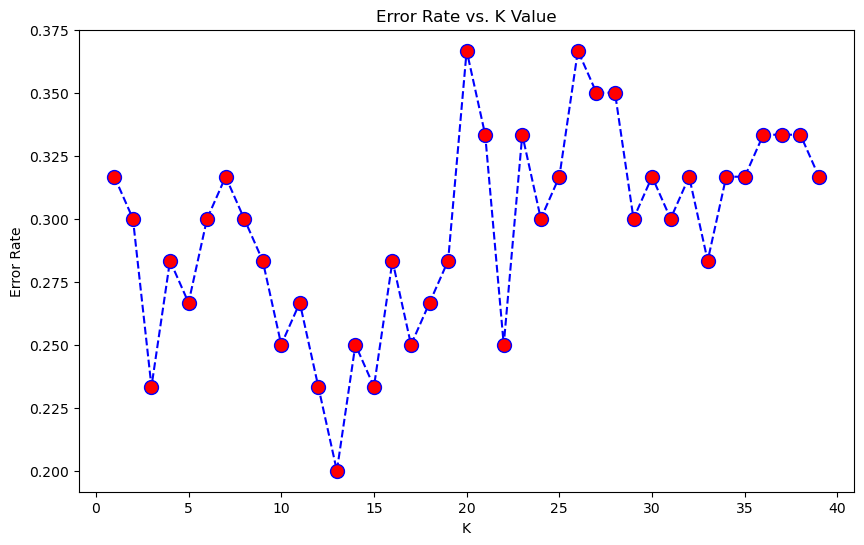

In [87]:
error_rate = []
for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train,y_train)
    predict_i = kNN.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#### From the previous graph will observe that the minimum error rate equal 20 % and this percentage occurs when K value = 13

In [88]:
KNN = KNeighborsClassifier(n_neighbors=13)
KNN.fit(X_train, y_train)

y_predknn = KNN.predict(X_test)

print(classification_report(y_test, y_predknn))

KNNAcc = accuracy_score(y_predknn,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.60      0.60      0.60         5
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         4
           4       0.70      0.78      0.74        18

    accuracy                           0.80        60
   macro avg       0.53      0.60      0.56        60
weighted avg       0.76      0.80      0.78        60

K Neighbours accuracy is: 80.00%


### 

### At the end, based on the accuracy we can say that Logistic Regresssion is better than KNN for this data 'cause as we can see the accuracy of Logistic Regression model is "81.67%" and this could increase with more preprocessing, and in the same time the accuracy of KNN model with the optimal K value is "80.00%".